In [1]:
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free sulfur dioxide   5197 non-null   float64
 6   total sulfur dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  quality               5197 non-null   int64  
 12  type_num              5197 non-null   int64  
 13  alc-sug               5197 non-null   float64
 14  qua-sug               5197 non-null   float64
dtypes: float64(13), int64

In [3]:
X = train.drop(columns=['quality'])  
y = train['quality']  

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

In [4]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15799 entries, 0 to 15798
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         15799 non-null  float64
 1   volatile acidity      15799 non-null  float64
 2   citric acid           15799 non-null  float64
 3   residual sugar        15799 non-null  float64
 4   chlorides             15799 non-null  float64
 5   free sulfur dioxide   15799 non-null  float64
 6   total sulfur dioxide  15799 non-null  float64
 7   density               15799 non-null  float64
 8   pH                    15799 non-null  float64
 9   sulphates             15799 non-null  float64
 10  alcohol               15799 non-null  float64
 11  type_num              15799 non-null  int64  
 12  alc-sug               15799 non-null  float64
 13  qua-sug               15799 non-null  float64
 14  quality               15799 non-null  int64  
dtypes: float64(13), int

In [5]:
X=df_balanced.drop(columns=['quality'])
y=df_balanced['quality']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [7]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid ={
    'classifier': [RandomForestClassifier()],
    'classifier__max_features': [1,2,3,4],
    'classifier__n_estimators': [50, 100, 150,200],
    'classifier__max_depth': [2, 5, 10],
       
}

rf = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [RandomForestClassifier()],
                         'classifier__max_depth': [2, 5, 10],
                         'classifier__max_features': [1, 2, 3, 4],
                         'classifier__n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [8]:
print(rf.best_estimator_)
print(rf.best_score_)
print(rf.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=1,
                                        n_estimators=200))])
0.8588495514268683
{'classifier': RandomForestClassifier(), 'classifier__max_depth': 10, 'classifier__max_features': 1, 'classifier__n_estimators': 200}


In [9]:
final_model= rf.best_estimator_.fit(X_train, y_train)
y_pred = rf.best_estimator_.predict(X_test)

In [10]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [11]:
print("Matriz de Confusión:")
print(cm)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy * 100))

Matriz de Confusión:
[[449   0   0   0   0   0   0]
 [  0 455   9   6   2   0   0]
 [  1  32 351  58  19   3   0]
 [  0  10 129 188 110  11   0]
 [  0   2  21  44 384   5   0]
 [  0   0   0   4   0 431   0]
 [  0   0   0   0   0   0 436]]

Tasa de Aciertos (Accuracy): 85.25%


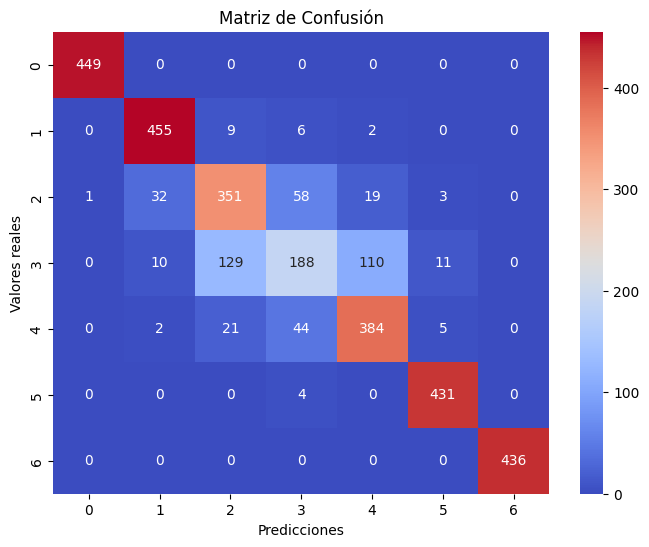

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [13]:
with open('../models/trained_model_1rf.pkl', 'wb') as modrfpipe :
    pickle.dump(final_model, modrfpipe)

# 2. GRADIANT BOOSTING

In [14]:
train = pd.read_csv('../data/train.csv')


In [15]:
X = train.drop(columns=['quality'])  
y = train['quality']  

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

In [16]:
X=df_balanced.drop(columns=['quality'])
y=df_balanced['quality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [18]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', GradientBoostingClassifier())  
])

param_grid = {
    'classifier__n_estimators': [50, 100, 150,200],
    'classifier__learning_rate': [0.1, 0.2,0.5,1],
    'classifier__max_depth': [3, 4, 5]
}

gb = GridSearchCV(pipe2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

gb.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.1, 0.2, 0.5, 1],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [19]:
print(gb.best_estimator_)
print(gb.best_score_)
print(gb.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.5, max_depth=5,
                                            n_estimators=200))])
0.904502292957577
{'classifier__learning_rate': 0.5, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}


In [20]:
gb_model= gb.best_estimator_.fit(X_train,y_train)
y_pred2 = gb.best_estimator_.predict(X_test)

In [21]:
cm2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Matriz de Confusión:")
print(cm2)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy2 * 100))

Matriz de Confusión:
[[449   0   0   0   0   0   0]
 [  0 472   0   0   0   0   0]
 [  0   6 373  76   9   0   0]
 [  1   4  84 293  63   3   0]
 [  0   0   3  25 428   0   0]
 [  0   0   0   0   0 435   0]
 [  0   0   0   0   0   0 436]]

Tasa de Aciertos (Accuracy): 91.33%


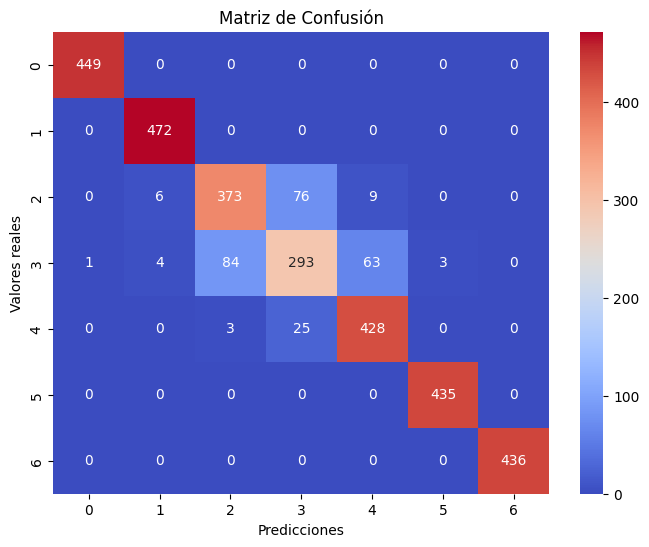

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='g', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [23]:
with open('../models/trained_model_2gb.pkl', 'wb') as archivo_salida :
    pickle.dump(gb_model, archivo_salida)

# 3- LOGISTIC REGRESSION

In [24]:
train = pd.read_csv('../data/train.csv')

X = train.drop(columns=['quality'])  
y = train['quality']  

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

In [25]:
X=df_balanced.drop(columns=['quality'])
y=df_balanced['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [26]:
pipe3 = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', LogisticRegression())  
])

param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [100, 200, 300,500],
    'classifier__solver': ['liblinear']
}

lg = GridSearchCV(pipe3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

lg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 300, 500],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy')

In [27]:
print(lg.best_estimator_)
print(lg.best_score_)
print(lg.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=100, max_iter=200, penalty='l1',
                                    solver='liblinear'))])
0.5262286295351971
{'classifier__C': 100, 'classifier__max_iter': 200, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [28]:
lg_model= lg.best_estimator_.fit(X_train,y_train)
y_pred3 = lg.best_estimator_.predict(X_test)

In [29]:
cm3 = confusion_matrix(y_test, y_pred3)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Matriz de Confusión:")
print(cm3)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy3 * 100))

Matriz de Confusión:
[[270  93  30   0  16  40   0]
 [ 84 237  96  14  26  15   0]
 [ 73  95 225  35  21  15   0]
 [ 56  50 104  87  73  72   6]
 [ 13  15  32  61 131 203   1]
 [ 24  10   5  49  84 253  10]
 [  0   0   0   0   0   0 436]]

Tasa de Aciertos (Accuracy): 51.87%


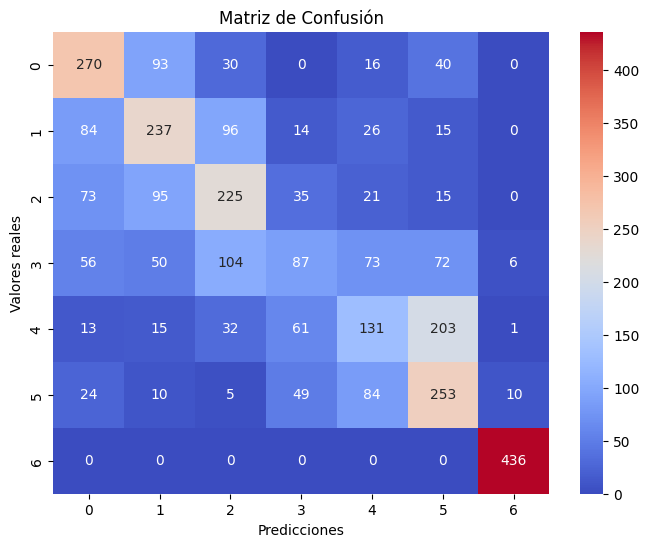

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='g', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [31]:
with open('../models/trained_model_3lg.pkl', 'wb') as archivo_salida :
    pickle.dump(lg_model, archivo_salida)

## 4. SVC MODEL

In [33]:
pipe4 = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', svm.SVC())
])


svm_param = {
    'classifier': [svm.SVC()],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100,200],
    
}    

svc = GridSearchCV(pipe4, svm_param, cv=5, scoring='accuracy', n_jobs=-1)

svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier': [SVC()],
                         'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100,
                                           200]},
             scoring='accuracy')

In [34]:
print(svc.best_estimator_)
print(svc.best_score_)
print(svc.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC(C=200))])
0.8690556546262391
{'classifier': SVC(), 'classifier__C': 200}


In [35]:
svc_model= svc.best_estimator_.fit(X_train,y_train)
y_pred4 = svc.best_estimator_.predict(X_test)

In [36]:
cm4 = confusion_matrix(y_test, y_pred4)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Matriz de Confusión:")
print(cm4)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy4 * 100))

Matriz de Confusión:
[[449   0   0   0   0   0   0]
 [  0 469   0   3   0   0   0]
 [  6  21 358  68  11   0   0]
 [  2  14 122 241  63   6   0]
 [  0   3  12  39 394   8   0]
 [  0   0   0   0   0 435   0]
 [  0   0   0   0   0   0 436]]

Tasa de Aciertos (Accuracy): 88.04%


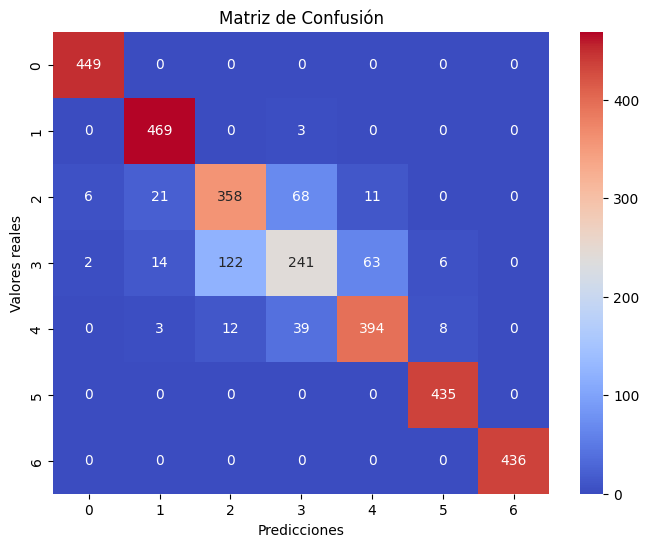

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='g', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [38]:
with open('../models/trained_model_4SVC.pkl', 'wb') as archivo_salida :
    pickle.dump(svc_model, archivo_salida)

## 5. KNEIGHBORS CLASSIFIER

In [39]:
pipe5 = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

knn_params = {
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [3, 5, 7,9,15],
}

knn = GridSearchCV(pipe5, knn_params, cv=5, scoring='accuracy', n_jobs=-1)

knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [KNeighborsClassifier()],
                         'classifier__n_neighbors': [3, 5, 7, 9, 15]},
             scoring='accuracy')

In [40]:
print(knn.best_estimator_)
print(knn.best_score_)
print(knn.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])
0.8462694356644442
{'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 3}


In [41]:
knn_mod= knn.best_estimator_.fit(X_train,y_train)
y_pred5 = knn.best_estimator_.predict(X_test)

In [42]:
cm5 = confusion_matrix(y_test, y_pred5)
accuracy5 = accuracy_score(y_test, y_pred5)
print("Matriz de Confusión:")
print(cm5)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy5 * 100))

Matriz de Confusión:
[[449   0   0   0   0   0   0]
 [  0 472   0   0   0   0   0]
 [  6  38 305  85  30   0   0]
 [  2  12 128 217  78  11   0]
 [  0   2  18  35 392   9   0]
 [  0   0   0   0   0 435   0]
 [  0   0   0   0   0   0 436]]

Tasa de Aciertos (Accuracy): 85.63%


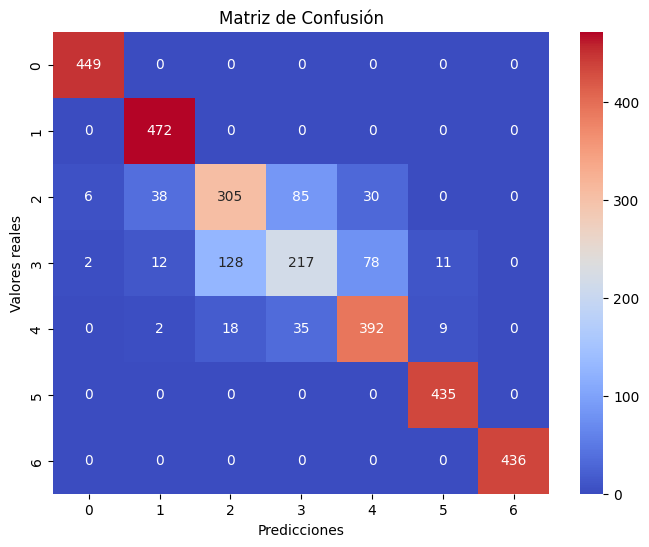

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='g', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [44]:
with open('../models/trained_model_5KNN.pkl', 'wb') as archivo_salida :
    pickle.dump(knn_mod, archivo_salida)